# GAIA Star Cluster - Plotting Information

## Authors
A. Crocker and B.W. Holwerda

## Learning Goals
* plot multiple values in a single plot.
* visualize all we know about a sample.
* compare to other data
* compare to models
* interpolating between models

* The Herzsprung-Russell Diagram of stars

## Keywords

color-magnitude diagram, stellar isochrones, 


## Companion Content


## Summary

The nearest stars to our Sun are of great interest to astronomy as a science and the imagination of everyone. 

<hr>

# Gaia project: comparing cluster color-magnitude diagrams

In this project, you'll use Gaia astrometric and photometric data on two stellar clusters to make color-magnitude diagrams and compare them. They'll mostly look the same, but will have some subtle differences because the two clusters are different ages!

Data biography: These data are all from data release 2 for the European Space Agency's Gaia mission. Identifying the Gaia sources belonging to each cluster was determined by [Gaia Collaboration, Babisaux et al. 2018](https://www.aanda.org/articles/aa/abs/2018/08/aa32843-18/aa32843-18.html), specifically, these data come from their Table A1a. However, they only published astrometric data in that Table, not the associated photometry! To also access the photometry, I used the Gaia IDs of all the sources for these two clusters and obtained all the Gaia data using this [search engine](https://gaia.ari.uni-heidelberg.de/singlesource.html) from the University of Heidelberg.

## Importing data
Our first step is to read in the two files on our two clusters: the alpha Perseus cluster ("alphaPer.csv") and Hyades ("hyades.csv"). Both are in standard comma-separated-variables format as indicated by the ".csv" extension. 

The first cell below imports the ascii sub-sub-package so we have all of its functions available to us in this notebook. 
- astropy is a Python package built for handling astronomical data. 
- astropy.io is a Python sub-package that deals with i = input and o = output of data.
- astropy.io.ascii is a Python sub-sub-package  that deals with the input and output of text data. We'll use its 'read' function to read our data into an astropy Table.

In [2]:
# Run this cell to import (i.e. make available in this notebook) 
# the ascii subpackage of astropy.io:
from astropy.io import ascii

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from matplotlib import rcParams
rcParams["savefig.dpi"] = 150
rcParams["figure.dpi"] = 150
rcParams["font.size"] = 15



In [3]:
ap_data = ascii.read("alphaPer.csv") 
hyd_data = ascii.read("hyades.csv")

### What data do we have exactly?

I wrote above that I included *all* the Gaia data. What does that consist of? We can see by asking one of the astropy Tables we've just made what the titles of its columns are:

In [4]:
ap_data.info()

<Table length=740>
              name                dtype     class     n_bad
-------------------------------- ------- ------------ -----
                  input_position   int64       Column     0
                        distance   int64 MaskedColumn   740
                       source_id   int64       Column     0
                     designation   str27       Column     0
                              ra float64       Column     0
                             dec float64       Column     0
                               l float64       Column     0
                               b float64       Column     0
                         ecl_lon float64       Column     0
                         ecl_lat float64       Column     0
                        parallax float64       Column     0
                            pmra float64       Column     0
                           pmdec float64       Column     0
                 phot_g_mean_mag float64       Column     0
                phot_

## Plot Hyades by position

That's a lot of data! Some titles are recognizable, at least, such as 'ra' and 'dec' for Right Ascension and Declination. As a start to plotting and a sanity check, we can see if the cluster stars appear as a cluster if we plot them in RA and Dec. You can access those values in the ap_data Table as: 
```
ap_data['ra']
ap_data['dec']
```

But, we still need to learn how to plot in Python! We'll use the matplotlib module of plotting tools and tell it to show the plots 'inline'. Then the code block below importing matplotlib just gives a very basic example of making a scatter plot. Using that as an example, **make a new code block that makes a scatter plot of the positions of either Hyades or alphaPer**!

Text(0.5, 0, 'y')

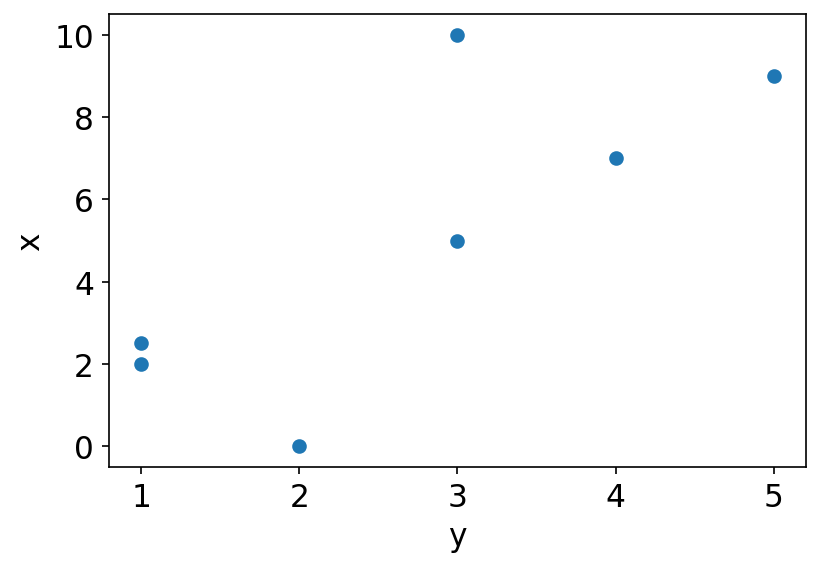

In [5]:
# A very basic scatterplot
plt.scatter([1,1,3,4,5,3,2],[2,2.5,5,7,9,10,0])
plt.ylabel('x')
plt.xlabel('y')

### Assignment 1

Make a plot of the positions of stars in Hyades or alphaPer here.

In [1]:
# Student work here


Hopefully that looks like a set of clustered star locations! But it's clear some symbols are on top of others. We can make that look a little better by making the symbols semi-transparent with the optional parameter 'alpha=0.5' added to the plt.scatter function. Give that a try.

## Making a color-magnitude diagram

In order to make a color-magnitude diagram, we need at least two measured magnitudes. We can subtract them to make a color index on the x-axis and then have one of them be the magnitude on the y-axis. Gaia has three passbands or filters:
- G: 330-1050 nm (column: 'phot_g_mean_mag')
- BP: 330-680 nm (column: 'phot_bp_mean_mag')
- RP: 630-1050 nm (column: 'phot_rp_mean_mag')

Using the same scatter plot function as above, choose the set of magnitudes that you think will give the best ability to discriminate color and plot a color-magnitude diagram for one of the two clusters!

(Do you want to flip the y-axis? See if you can find out how to with a quick Google search. If you get stuck, as for help!)

### Assignment 2

Make color-magnitude diagram for one of the two cluster here. Note that (a) brighter in magnitudes a lower number and (b) the need to label the axes.

In [2]:
# Student work here


### Assignment 3

Make color-magnitude diagram for one of the two cluster here. Next, add the data from the other cluster in a different color. You can do this by just adding a second plt.scatter() or plt.plot to your code block above.

Make two-cluster color-magnitude diagram here (just copy and paste code from above and add a little bit).

In [3]:
# Student work




### Assignment 4
Discuss the following questions:
   1. What type of magnitudes must these be, absolute or apparent? Why?
   2. Which cluster is more distant? 

*student answer here*

### Assignment 5

Finally, let's make a color-magnitude diagram that does correct for distance by having the magnitude corresponding to luminosity on the y-axis. To do that most easily, you probably want to create a function that takes in apparent magnitude and parallax (which is in milli-arcsec in the Gaia data) and computes absolute magnitude. Below is an example of making a simple function in Python. Follow that model to first make the needed function and then plot an absolute magnitude versus color diagram for both clusters!

In [9]:
import numpy as np # a package with lots of helpful vector/array math functions

def example_function(a,b):
    value = np.log10(a)*b
    return value

In [4]:
# student work here


### Make your final color-magnitude diagram here. Make sure to label axes!

In [5]:
# student work here



### Do the absolute magnitudes agree? 

*student answer here*

# Stellar Isochrones

Models of stellar evolution can predict the color and luminosity of a population of stars at a given age and metallicity (elements other than hydrogen and helium).

First we will read in a catalog of values from the MIST. These are text files made from the simulation outputs (http://waps.cfa.harvard.edu/MIST/index.html). 

The models are for different metallicities. Astronomers count hydrogen, helium and metals (everything else) but this is often measures using Iron (Fe) over hydrogen (H) abundances. This is a logarithmic scale of the ratio of lines observed in a spectrum.
Solar metallicity is calibrated as Fe/H = 0. Most younger generations of stars will therefore be lower (negative).

In [39]:
from astropy.io import ascii
import numpy as np
mist_FeHm3  = ascii.read("MIST_FeHm3.txt")   # Fe/H = -3 
mist_FeHm2  = ascii.read("MIST_FeHm2.txt")   # Fe/H = -2
mist_FeHm1  = ascii.read("MIST_FeHm1.txt")   # Fe/H = -1
mist_FeHm05 = ascii.read("MIST_FeHm05.txt")  # Fe/H = -0.5
mist_FeH0   = ascii.read("MIST_FeHm0.txt")   # Fe/H = 0

# correcting the photometry (fudging really)
mist_FeHm3['G'] -= 1.2
mist_FeHm2['G'] -= 1.2
mist_FeHm1['G'] -= 1.2
mist_FeHm05['G'] -= 1.2
mist_FeH0['G'] -= 1.2

mist_FeHm3

Age,BP,RP,G
float64,float64,float64,float64
5.0,7.101481,5.550901,5.140868
5.0,7.061173,5.516664,5.104341
5.0,6.982573,5.449829,5.033046
5.0,6.904818,5.383682,4.962464
5.0,6.828053,5.318356,4.892738
5.0,6.752297,5.253782,4.823795
5.0,6.677513,5.190015,4.7556959999999995
5.0,6.603634,5.127016,4.688403
5.0,6.530787,5.064908,4.6220419999999995


### Assignment 6 

What is in each of these model files?

Describe what the table entries are in this model file. 
Can you make similar points like on the color-magnitude diagram earlier?

*student answer here*

### MIST Models

We will now compare these GAIA H-R plots to the models generated from the MIST project (https://waps.cfa.harvard.edu/MIST/). 

### Assignment 7

Plot the MIST model for Fe/H=-3 and 5 Gyr old population (use np.where).
Plot the G Absolute Magnitude as a function of the BP-RP color 

Note that magnitudes are brighter the lower the number. Adjust your y-limits accordingly

In [7]:
# student work here


### Assignment 8

Now plot each age in the range 5-10 Gyr in steps of 1 Gyr.
Plot one of the clusters' data on top. 

In [6]:
# student work here


### Assignment 9

Which of the Fe/H=-3 models seem to agree with the Main Sequence turnoff? What age would you give this cluster *if you assume Fe/H=-3*? Can you refine this estimate some if you make the steps in the previous plot 0.5 Gyr?

*student answer here*

### Assignment 10

Does the best the Fe/H=-3 model describe the color-magnitude diagram of the AP cluster well? Motivate why/why not.

*student answer here*

### Assignment 11

Plot another metallicity (not Fe/H=-3) and compare to your choice of cluster's color-magnitude measurements.

In [8]:
# student work here


### Assignment 12

Which one of these clusters is the oldest? Motivate your anwer using the color-magnitude diagram.

In [9]:
# student work here
